In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
plt.rcParams['figure.figsize'] = (15,7)
from datetime import timedelta, datetime

In [5]:
data=pd.read_csv(r"D:\marlabs\Datasets\athlets.csv")#olympic athlets data
data1=pd.read_csv(r"D:\marlabs\Datasets\noc.csv")#countries data with codes


In [6]:
df=pd.merge(data,data1,on='NOC',how='outer')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271117 entries, 0 to 271116
Data columns (total 17 columns):
ID        271116 non-null float64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271117 non-null object
Games     271116 non-null object
Year      271116 non-null float64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
region    270747 non-null object
notes     5039 non-null object
dtypes: float64(5), object(12)
memory usage: 37.2+ MB


In [5]:
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1.0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2.0,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN


In [6]:
df.shape

(271117, 17)

In [7]:
#  dropping the duplicates from the dataset.
print(data.shape)
data = data.drop_duplicates(keep='first')
print(data.shape)

(271116, 15)
(269731, 15)


In [8]:
df.isnull().sum()

ID             1
Name           1
Sex            1
Age         9475
Height     60172
Weight     62876
Team           1
NOC            0
Games          1
Year           1
Season         1
City           1
Sport          1
Event          1
Medal     231334
region       370
notes     266078
dtype: int64

In [9]:
#remove notes column
df=df.drop(['notes'],axis=1)

In [10]:
#dropping that one row where everything is missing except region name
df=df.dropna(subset=['ID'])


In [11]:
#df['Age']=df.Age.astype(int)

In [11]:
df.dtypes

ID        float64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year      float64
Season     object
City       object
Sport      object
Event      object
Medal      object
region     object
dtype: object

In [12]:
#replacing null values in Medal column with 'No-Medal'
df["Medal"].fillna("No_medal", inplace = True) 


In [13]:
df.isnull().sum()

ID            0
Name          0
Sex           0
Age        9474
Height    60171
Weight    62875
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
region      370
dtype: int64

In [14]:
df['region'] = np.where(df['region'].isnull(), df['Team'], df['region'])


In [15]:
#replace age with mean_age
df['Age'].mean()

25.556898357297374

In [16]:
df["Age"].fillna(df['Age'].mean(), inplace = True) 

In [17]:
#replace missing values in Height column with mean value based on Gender 
df['Height'] = df.groupby(['Sex'])['Height']\
    .transform(lambda x: x.fillna(x.mean()))

In [18]:
#replace missing values in Weight column with mean value based on Gender
df['Weight'] = df.groupby(['Sex'])['Weight']\
    .transform(lambda x: x.fillna(x.mean()))

In [19]:
df['Height']=df['Height'].astype(int)

In [20]:
df['ID']=df['ID'].astype(int)

In [21]:
df['Weight']=df['Weight'].astype(int)

In [22]:
df['Age']=df['Age'].astype(int)

In [23]:
df['Year']=df['Year'].astype(int)

In [24]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No_medal,China
1,2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No_medal,China
2,602,Abudoureheman,M,22,182,75,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,No_medal,China
3,1463,Ai Linuer,M,25,160,62,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",No_medal,China
4,1464,Ai Yanhan,F,14,168,54,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,No_medal,China


In [25]:
df1=df.copy()

In [26]:
df1.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No_medal,China
1,2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No_medal,China
2,602,Abudoureheman,M,22,182,75,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,No_medal,China
3,1463,Ai Linuer,M,25,160,62,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",No_medal,China
4,1464,Ai Yanhan,F,14,168,54,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,No_medal,China


In [134]:
len(df.Event.unique())


765

In [27]:
#Data Visualization
#Total Number of Participants
len(df.ID.unique())


135571

In [28]:
#Gender wise participation
df.ID.unique()

array([     1,      2,    602, ..., 122166, 122215, 122299], dtype=int64)

In [29]:
#Number of participants by Gender
Gender_ratio=pd.DataFrame(df.groupby('Sex')['ID'].nunique())
#Gender_ration.columns=['Gender','Total_number']
#Gender_ratio.Total_number=Gender_ratio.Total_number/135571*100

In [30]:
#Participants Ratio
Gender_ratio.reset_index(level=0, inplace=True)


In [31]:
Gender_ratio

,Sex,ID
0,F,33981
1,M,101590


In [32]:
Gender_ratio.dtypes

Sex    object
ID      int64
dtype: object

In [33]:
Gender_ratio.reset_index(level=0, inplace=True)


In [34]:
Gender_ratio

,index,Sex,ID
0,0,F,33981
1,1,M,101590


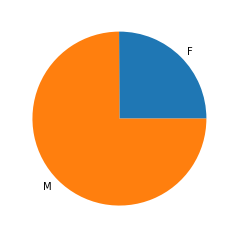

In [35]:
plt.pie(Gender_ratio.ID,labels=Gender_ratio.Sex)
plt.show()

In [36]:
#Year started
df.Year.min()

1896

In [37]:
df.Year.max()

2016

In [38]:
df=df.round({'Height':1})

In [123]:
cm_to_mtr=0.01
df['Height']*=cm_to_mtr

In [127]:
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,BMI
0,1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,No_medal,China,25.0
1,2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,No_medal,China,21.0


In [124]:
#BMI column create
df['BMI']=round(df['Weight']/(df['Height']**2))

In [ ]:
df.Height=df1.Height

In [43]:
#Year=df.groupby(['Year','Medal']).agg('count')

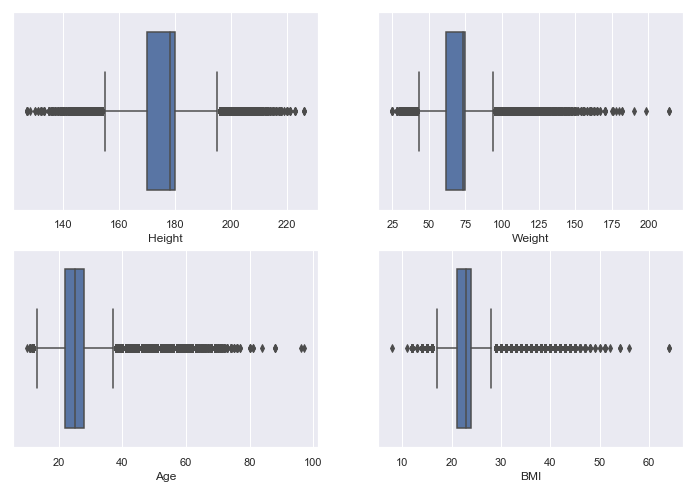

In [128]:
x,y=plt.subplots(2,2,figsize=(12,8))
sns.boxplot(df.Height,ax=y[0,0])
sns.boxplot(df.Weight,ax=y[0,1])
sns.boxplot(df.Age,ax=y[1,0])
sns.boxplot(df.BMI,ax=y[1,1])

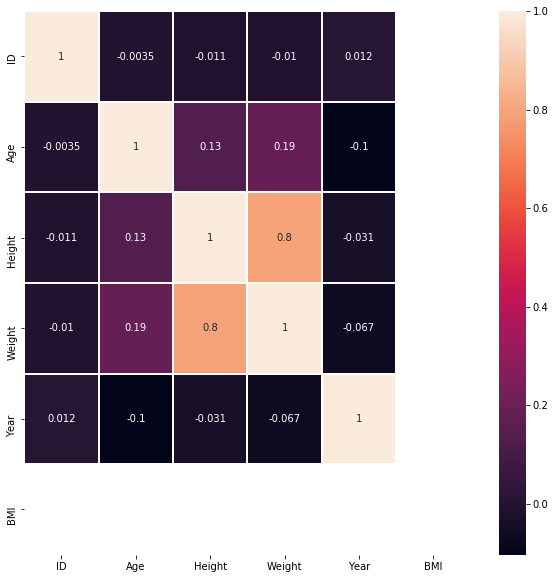

In [45]:
plt.subplots(figsize=(10,10))
co = df.corr()
sns.heatmap(co, annot=True, linewidths=1.0)

In [46]:
#no correlation 

In [129]:
df.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,BMI
0,1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,No_medal,China,25.0


In [48]:
#df[['NOC','Games','Event']].df[['Medal'=='No_medal']]
#df[df['gender']==1]['bmi'].mean()

country_wise=df[df['Medal']!='No_medal'][['region','Games','Event','Medal']]


In [49]:
countrys_wise=df[df['Medal']!='No_medal'][['region','Year','Event','Medal']]

In [50]:
len(country_wise)

39783

In [51]:
#Total medals Tally
country_wise.groupby('Medal')['region'].count()

Medal
Bronze    13295
Gold      13372
Silver    13116
Name: region, dtype: int64

In [52]:
country_wise.columns

Index(['region', 'Games', 'Event', 'Medal'], dtype='object')

In [53]:
#Countrywise Medals
list=country_wise.groupby(['region'])['Medal'].count().sort_values(ascending=False).reset_index()

In [54]:
#extracting Top 10 countries
list=list[:10]

In [55]:
list

,region,Medal
0,USA,5637
1,Russia,3947
2,Germany,3756
3,UK,2068
4,France,1777
5,Italy,1637
6,Sweden,1536
7,Canada,1352
8,Australia,1349
9,Hungary,1135


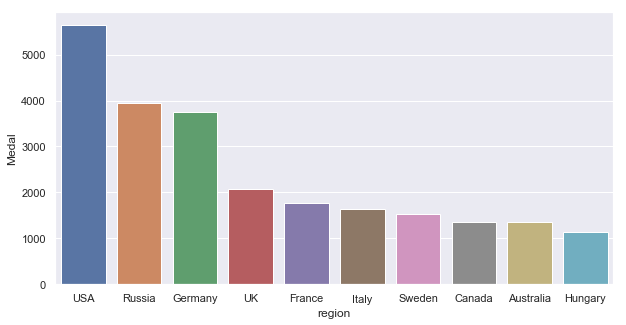

In [211]:
plt.figure(figsize=(10,5))
sns.barplot(data=list,x='region',y='Medal')

In [57]:

list1=country_wise.groupby(['region','Medal'])['Games'].count().sort_values(ascending=False).reset_index()

In [ ]:
sns

In [58]:
list1[list1.region=='USA']

,region,Medal,Games
0,USA,Gold,2638
1,USA,Silver,1641
3,USA,Bronze,1358


In [59]:
list2=pd.DataFrame()
for x in list.region:
    dn=list1[list1.region==x]
    list2=list2.append(dn)
    
    
    

In [60]:
list2.head()

,region,Medal,Games
0,USA,Gold,2638
1,USA,Silver,1641
3,USA,Bronze,1358
2,Russia,Gold,1599
7,Russia,Bronze,1178


In [61]:
list3=list2.pivot(index='region',columns='Medal',values='Games')



In [62]:
list3['region1']=list3.index

In [63]:
list3.index = np.arange(1, len(list3)+1)

    

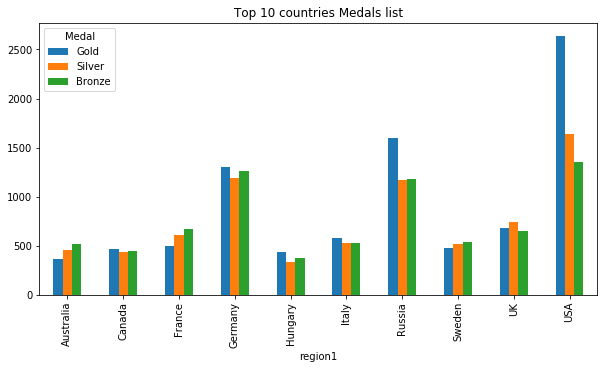

In [64]:

list3.plot(x='region1', y=['Gold', 'Silver','Bronze'], figsize=(10,5),kind='bar',\
           title='Top 10 countries Medals list',grid=0)
plt.show()


In [65]:
#country_wise.columns
games_wise=country_wise.groupby(['Games','region'])['Medal'].count().reset_index()

In [66]:
list4=pd.DataFrame()
for x in list.region:
    dn=games_wise[games_wise.region==x]
    list4=list4.append(dn)
    

In [135]:
year_wise=countrys_wise.groupby(['Year','region'])['Medal'].count().reset_index()



In [136]:
year_wise=game_wise.groupby('Year').sum().reset_index()

In [137]:
year_wise.head()

,Year,Medal
0,1896,143
1,1900,604
2,1904,486
3,1906,458
4,1908,831


Text(0, 0.5, 'Total n.o of medals')

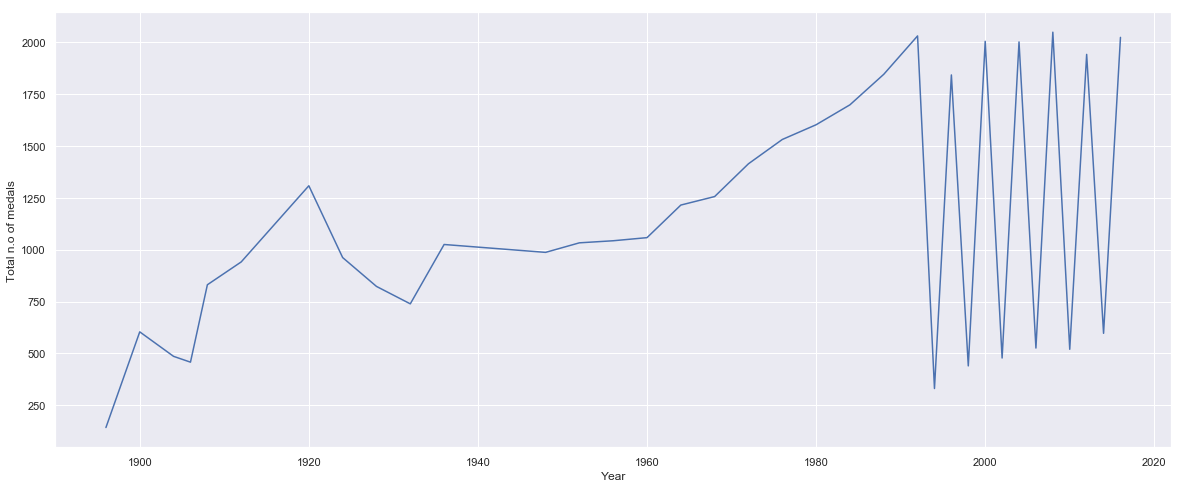

In [138]:
plt.figure(figsize=(20,8))
x=year_wise.Year
y=year_wise.Medal
plt.plot(x,y)
plt.xlabel('Year')
plt.ylabel('Total n.o of medals')


In [73]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,BMI
0,1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No_medal,China,0.0
1,2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No_medal,China,0.0
2,602,Abudoureheman,M,22,182,75,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,No_medal,China,0.0
3,1463,Ai Linuer,M,25,160,62,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",No_medal,China,0.0
4,1464,Ai Yanhan,F,14,168,54,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,No_medal,China,0.0


In [74]:
season_wise=df[df['Medal']!='No_medal'][['Season','Sex','region','Medal']]

In [75]:
season_wise.head()

,Season,Sex,region,Medal
8,Winter,M,China,Silver
10,Winter,M,China,Bronze
11,Winter,M,China,Bronze
12,Summer,F,China,Silver
17,Summer,F,China,Bronze


In [76]:
season_wise.groupby(['Season'])['Medal'].count().reset_index()

,Season,Medal
0,Summer,34088
1,Winter,5695


In [77]:
a=season_wise.groupby(['Season','Sex'])['Medal'].count().reset_index()

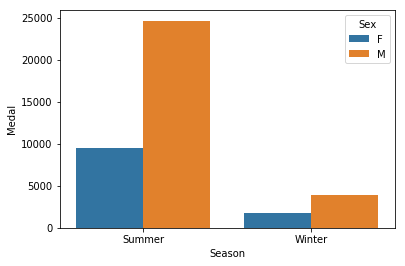

In [78]:

sns.barplot(data=a,x='Season',y='Medal',hue='Sex')

In [7]:
#number of events,athlets,nations  excluding Art competition
Events=df[df['Sport']!='Art Competitions'].groupby(['Year','Season']).Event.nunique().reset_index()
Athlets=df[df['Sport']!='Art Competitions'].groupby(['Year','Season']).ID.nunique().reset_index()
Nations=df[df['Sport']!='Art Competitions'].groupby(['Year','Season']).NOC.nunique().reset_index()


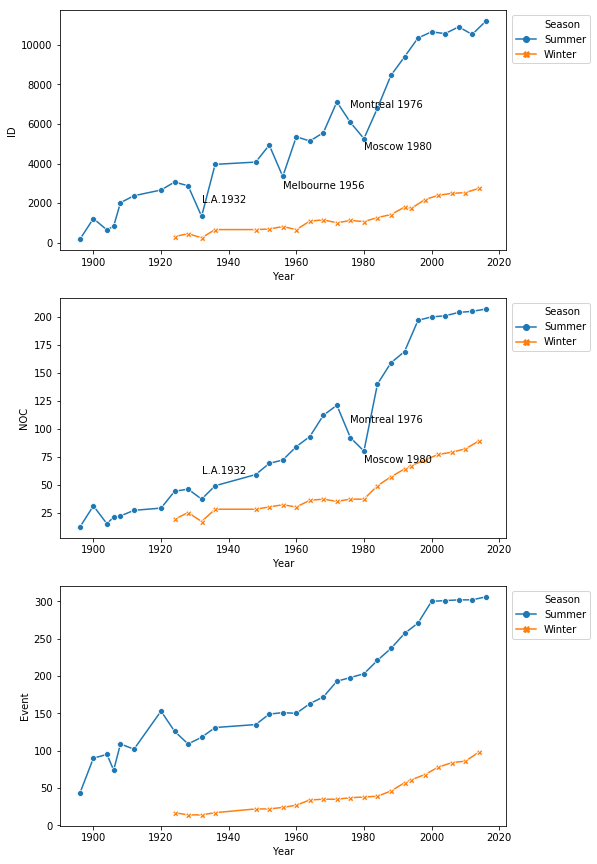

In [8]:
fig,ax=plt.subplots(3,1,figsize=(8,15))
sns.lineplot(data=Athlets,x='Year',y='ID',hue='Season',style='Season',markers=True,dashes=False,ax=ax[0])
ax[0].annotate(s=('L.A.1932'),xy=(1932,2000))
ax[0].annotate(s=('Melbourne 1956'),xy=(1956,2750))
ax[0].annotate(s=('Montreal 1976'),xy=(1976,6800))
ax[0].annotate(s=('Moscow 1980'),xy=(1980,4700))
ax[0].legend(loc='upper right',bbox_to_anchor=(1.2,1))
sns.lineplot(data=Nations,x='Year',y='NOC',hue='Season',style='Season',markers=True,dashes=False,ax=ax[1])
ax[1].annotate(s=('L.A.1932'),xy=(1932,60))
ax[1].annotate(s=('Montreal 1976'),xy=(1976,105))
ax[1].annotate(s=('Moscow 1980'),xy=(1980,70))
ax[1].legend(loc='upper right',bbox_to_anchor=(1.2,1))
sns.lineplot(data=Events,x='Year',y='Event',hue='Season',style='Season',markers=True,dashes=False,ax=ax[2])
ax[2].legend(loc='upper right',bbox_to_anchor=(1.2,1))
plt.show()

In [81]:
df1=df1[df1.Sport!='Art Competitions']

In [85]:
original[0]

1994

In [86]:
original=[1994,1998,2002,2006,2010,2014]
len(original)

6

In [87]:
new=[1996,2000,2004,2008,2012,2016]

In [88]:
for i in range(len(original)):
    df.Year=df.Year.replace({original[i]:new[i]})
    
    
    

In [89]:
len(df)

271116

In [90]:
len(df1)

267538

In [91]:
df['Year']=df1['Year']

In [92]:
df1=df.copy()

In [93]:
gender_count=df.groupby(['Year','Sex']).ID.nunique().reset_index()

In [94]:
gender_count.head()

,Year,Sex,ID
0,1896.0,M,176
1,1900.0,F,23
2,1900.0,M,1201
3,1904.0,F,6
4,1904.0,M,644


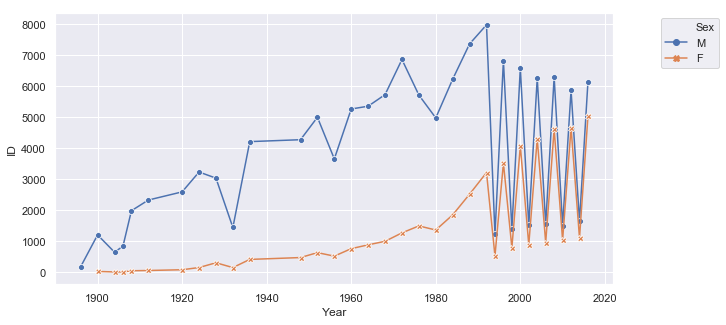

In [210]:
plt.figure(figsize=(10,5))
sns.lineplot(data=gender_count,x='Year',y='ID',hue='Sex',style='Sex',markers=True,dashes=False)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,1))
plt.show()

In [96]:
women=df[df['Year'].isin([1936,1956,1976,1996,2016])].groupby(['Year','NOC','Sex']).ID.nunique().reset_index()

In [97]:
women.head()


,Year,NOC,Sex,ID
0,1936.0,AFG,M,15
1,1936.0,ARG,F,1
2,1936.0,ARG,M,50
3,1936.0,AUS,F,4
4,1936.0,AUS,M,29


In [98]:

women1=women.groupby(['Year', 'NOC', 'Sex'])['ID'].sum().unstack('Sex').reset_index()

In [99]:
women1.head()

Sex,Year,NOC,F,M
0,1936.0,AFG,NaN,15.0
1,1936.0,ARG,1.0,50.0
2,1936.0,AUS,4.0,29.0
3,1936.0,AUT,27.0,205.0
4,1936.0,BEL,8.0,138.0


In [100]:
x=pd.DataFrame()
for i in range(0,len(women1)):
    if women1.loc[i]['F']+women1.loc[i]['M']>49:
        dn=women1.loc[i]
        x=x.append(dn)
        

In [105]:
women1['F']=women1['F'].astype(int)

In [106]:
women1.dtypes

Sex
Year    float64
NOC      object
F         int32
M        object
dtype: object

In [107]:
women1["F"].fillna("0", inplace = True) 

In [109]:
women.head()

,Year,NOC,Sex,ID
0,1936.0,AFG,M,15
1,1936.0,ARG,F,1
2,1936.0,ARG,M,50
3,1936.0,AUS,F,4
4,1936.0,AUS,M,29


In [110]:
x['Year']=x['Year'].astype(int)

In [111]:
z=df[df['Year'].isin([1936,1956,1976,1996,2016])].groupby(['Year','NOC','Sex']).ID.nunique().reset_index()

y=z.pivot_table(values='ID',index='Year',columns='Sex',aggfunc=lambda x:len(x.unique())).reset_index()


In [112]:
y

Sex,Year,F,M
0,1936.0,19,45
1,1956.0,21,50
2,1976.0,32,57
3,1996.0,46,74
4,2016.0,64,74


In [113]:
women1=z.groupby(['Year', 'NOC','Sex'])['ID'].sum().unstack('Sex').reset_index()

In [118]:
women1.head()

Sex,Year,NOC,F,M
0,1936,AFG,NaN,15.0
1,1936,ARG,1.0,50.0
2,1936,AUS,4.0,29.0
3,1936,AUT,27.0,205.0
4,1936,BEL,8.0,138.0


In [117]:
women1['Year']=women1['Year'].astype(int)

C:\Users\rameshsrujana\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


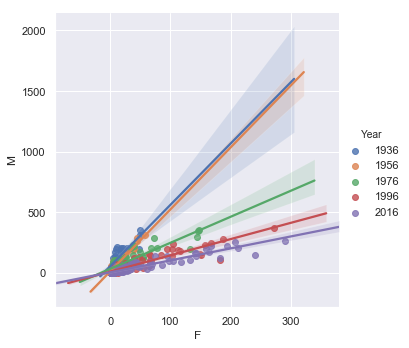

In [119]:
sns.lmplot(x='F',y='M',data=women1,hue='Year')

In [150]:
event_wise=df[df['Medal']!='No_medal'][['region','Games','Sport','Medal','Year']]

In [151]:
len(event_wise)

39783

In [152]:
event_wise.head(2)

,region,Games,Sport,Medal,Year
8,China,1998 Winter,Short Track Speed Skating,Silver,1998.0
10,China,1998 Winter,Short Track Speed Skating,Bronze,1998.0


In [191]:
max1=event_wise.groupby(['region','Sport'])['Medal'].count().reset_index()
#In [2]: df.groupby(['Mt'], sort=False)['count'].max()


In [201]:
max1.head()

,region,Sport,Medal
0,Afghanistan,Taekwondo,2
1,Algeria,Athletics,9
2,Algeria,Boxing,6
3,Algeria,Judo,2
4,Argentina,Athletics,5


In [205]:
max2=max1.groupby(['Sport'],sort=False)['Medal'].max().reset_index()

In [206]:
len(max2)

66